# Project 2: Cerulean City Sea Shenanigans

**Name(s):**

1.

2.

3.


---

In this project, we will work with normal, exponential, gamma, and Weibull distributions, including calculating probabilities and quantiles for random variables with these distributions. We will use **sea levels** for the fictitious Cerulean City and the all-too-real city of Key West as an application to demonstrate these topics. We will conclude with a common way to compare probabilities of events: the **odds ratio**. Odds are: you'll have a great, or at least acceptable, time.

---

**Project Rules:**

* **NEW: You will lose 3 "logistics" points if you supply an equation with mathematical formatting that is _not_ formatted in LaTeX. (E.g., "sqrt(2)" instead of $\sqrt{2}$, or "x^3" instead of $x^3$)**
* You can work in groups of **up to 3 students**.
* You are encouraged to collaborate with others and other groups in the class, but different groups' submissions should be different.
* You must **show all work** and **fully justify** your solutions.
* You will lose points if you supply a text answer (say, providing an explanation, or the distribution of a parameter) in a code cell.
* The notebook is partitioned into a few different sections, each of which accompanies a different day of lecture as detailed on the course schedule on myCourses. Toward the end, the problems will rely on previous days of lecture material as well, and **may require some time outside of class to complete**. Please plan accordingly with your group.

---

<br>

<br>

---

## Accompanying Thursday October 19 - Normal Random Variables...

### Warm-ups

What is $P(Z \leq 1.25)$?

In [ ]:
# pnorm computes the cdf
pnorm(1.25)

[1] 0.8943502

What value $z$ is the 99th percentile of the standard normal distribution?

In [ ]:
# qnorm gives percentiles
qnorm(0.99)

[1] 2.326348

<br>

### Background

**Cerulean City** sits on the sea shore, and its residents enjoy all sorts of great recreation, fishing, and pokeman-catching. Pokemans are a major export of Cerulean City, and a key part of their local economy. Their pleasant seaside existence mirrors that of the people of Watkins Glen, New York, on the shores of the lovely Seneca Lake, which is _really deep you guys_.

The Cerulean City folks' enjoyment of their seaside city relies on being able to manage the dangers that the ocean holds. High water levels vary with tides, seasonal changes, groundwater use, and longer term changes in the global climate. On a day-to-day basis though, we can view the water levels as a **random variable**.

<br>

### Task 1: probability for water levels

Suppose local daily high water levels in Cerulean City are normally distributed with mean 1 meter and standard deviation 0.25 meters. Use the `pnorm` function to:

a) compute the probability that the high water height today is greater than 0.9 meters; and

b) compute the probability that the high water height today is between 0.9 and 1.5 meters.

_**Remember** to include arguments for `mean` and `sd` in your use of `pnorm` in order to set the mean and standard deviation for the normal distribution you are using! Answer check: 0.66 and 0.63_

**SOLUTION:**

In [ ]:
mu = 1
stdev = 0.25

print(paste0("P(X > 0.9) = 1-P(X < 0.9) = ",1-pnorm(0.9, mean=mu, sd=stdev)))
print(paste0("P(0.9 < X < 1.5) = P(X < 1.5) - P(X < 0.9) = ",pnorm(1.5, mean=mu, sd=stdev)-pnorm(0.9, mean=mu, sd=stdev)))

[1] "P(X > 0.9) = 1-P(X < 0.9) = 0.655421741610324"
[1] "P(0.9 < X < 1.5) = P(X < 1.5) - P(X < 0.9) = 0.632671609662145"


<br>

### Task 2

What values of a standard normal random variable $Z$ do high water heights of 0.9 and 1.5 meters correspond to? _Answer check: one of them is -0.4_

**SOLUTION:**

In [ ]:
print(paste0("0.9 --> Z = ",(0.9 - mu)/stdev))
print(paste0("1.5 --> Z = ",(1.5 - mu)/stdev))

[1] "0.9 --> Z = -0.4"
[1] "1.5 --> Z = 2"


<br>

### Task 3

Suppose the water levels on different days are indepedent of one another. Compute the probability that the water height both today and tomorrow exceed 0.9 meters. _Answer check: about 0.43_

**SOLUTION:**

$P(X_1 > 0.9 \cap X_2 > 0.9) \stackrel{\text{indep}}{=} P(X_1 > 0.9) \cdot P(X_2 > 0.9) = (0.655)^2 = 0.43$

In [ ]:
(1-pnorm(0.9, mean=mu, sd=stdev))^2

[1] 0.4295777

<br>

### Task 4: high water levels for probabilities

Compute the 99th percentile of the daily high water levels for Cerulean City. Include units, if appropriate.

**SOLUTION:**

In [ ]:
print(paste0("99th percentile is: ",qnorm(0.99, mean=mu, sd=stdev)," meters"))

[1] "99th percentile is: 1.58158696851021 meters"


<br>

### Task 5

Suppose on any given day that the probability that water levels are _dangerously high_ is 0.02. How high of a water level is dangerous? Include units, if appropriate.

**SOLUTION:**

In [ ]:
print(paste0("Dangerously high water level is: ",qnorm(1-0.02, mean=mu, sd=stdev)," meters"))

[1] "Dangerously high water level is: 1.51343722765796 meters"


<br>

---

## Using a normal distribution to approximate the binomial distribution

<br>

### Task 6

Continue to suppose that on any given day that the probability that water levels are dangerously high is 0.02, and whether or not any days are or are not dangerous is independent of one another.

Let the random variable $X$ represent the total number of days that have dangerously high water levels this year (which for the sake of this problem we'll assume is not a leap year). Suppose we view each day of the year as an independent _trial_ or _experiment_, and the outcome of that experiment is whether or not the water levels were dangerous. Then each day's outcome is Bernoulli (dangerous or not) and the total number of dangerously high water level days ($X$) has a **binomial distribution**. What are the parameters, including their values, for the distribution of $X$?

**SOLUTION:**

$X \sim Bin(n=365, p=0.02)$

<br>

### Task 7

What is the probability of observing 10 or more dangerously high daily water levels this year? Calculate **exactly** using the approxpriate distribution. _Answer check: should be about 0.2_

Recall that the [`pbinom` function](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Binomial.html) in R computes the binomial distribution cdf. For example, the following code computes the probability that a random variable with distribution $Bin(n=4, p=1/3)$ is less than or equal to 3.
```
pbinom(3, size=4, prob=1/3)
```

**SOLUTION:**

In [ ]:
1 - pbinom(9, size=365, p=0.02)

[1] 0.1992869

<br>

### Task 8

Let's use a normal distribution to approximate the binomial distribution for $X$. Compute the mean and standard deviation for $X$.

**SOLUTION:**

$\mu = np = 365 \cdot 0.02 = 7.3$

$\sigma = \sqrt{np(1-p)} = \sqrt{365\cdot 0.02 \cdot 0.98} = 2.675$

In [ ]:
mu = 365*0.02
print(mu)

sigma = sqrt(365*0.02*(1-0.02))
print(sigma)

[1] 7.3
[1] 2.674696


<br>

### Task 9

Let $Y$ be a random variable with a normal distribution whose mean and standard deviation match those of the distribution for $X$. What is the probability that $Y$ is at least 10? _Answer check: should be about 0.16_

In [ ]:
### SOLUTION:

1 - pnorm(10, mean=mu, sd=sigma)

[1] 0.1563769

You should find that your answers for $P(X \geq 10)$ and $P(Y \geq 10)$ do _not_ match. This might fill you with [despair](https://www.smbc-comics.com/comic/2015-01-21). Take a second for that feeling to sink in.

<br>

...

<br>

Done? Okay.

The reason for the difference is that we are using $Y$, a continuous variable, to estimate $X$, a discrete variable.

When we compute the total _true_ probability $P(X \geq 10)$, this includes the pmf box above the value $X=10$. The box extends from 9.5 on the left to 10.5 on the right, as seen in the orange shaded region in the figure from SALT below.

<img src="https://github.com/tonyewong/math251_fall2023/blob/master/figs/binom_pmf.png?raw=true" width="600px;">

When we computed $P(Y \geq 10)$, on the other hand, the adding up of probabilities starts at exactly 10 instead of at 9.5, as is the case for $X$.

<br>

### Task 10: A Continuity Correction

We can account for this discrepency by starting our integral for $Y$ at 9.5 instead of at 10. This is called a **Continuity Correction**.

Compute an appropriate estimate for $P(X \geq 10)$ using the probability distribution for $Y$, and our new and improved endpoints. Your answer should agree much better with $P(X \geq 10)$.

**SOLUTION:**

In [ ]:
1 - pnorm(9.5, mean=mu, sd=sigma)

[1] 0.2053896

<br>

---

<br>

## Accompanying October 24 - Exponential and Gamma Random Variables...

For years, Cerulean City has been plagued by attacks from the monster Gyrodos. It's like the Pokemon Gyarados, but feasts mostly on delicious Greek foods. However, as Gyrodos pursues its passion for pitas by ransacking food carts and Greek restaurants everywhere, it causes tremendous amounts of damage to the city. Luckily, in an average decade, there are only 3 Gyrodos incidents. Note that we don't call them "attacks" because they just want gyros and really, who can blame them?

<img src="https://i.imgur.com/M8oNsAT.jpeg" width="300px;"> _(Original is [here](https://www.reddit.com/r/pokememes/comments/5ej11t/please_enjoy_this_picture_of_gyarados_rare/) on `/r/pokememes`)_

<br>

### Task 11

Among the distributions that we have studied in our course, what is an appropriate distribution for the number of Gyrodos incidents per year? Include the values of any appropriate parameters for the distribution, using **years** as our time unit (**not** 10 years).

_Hint: first, consider whether the distribution should be continuous or discrete. Then, what are all the types of distribution that we could use? Please be encouraged to check in with other groups and/or the course staff!_

**SOLUTION:**

A Poisson distribution with rate parameter $\lambda = 3/10$ attacks/year.

<br>

### Task 12

Using your distribution from above, what is the probability of 2 or more Gyrodos incidents this year?

Also, what is the probability of just 1 Gyrodos incident in the next 2 years? _(Answer check: about 0.33)_


**SOLUTION:**

In [ ]:
1-ppois(1, lambda=3/10)

[1] 0.03693631

In [ ]:
dpois(1, lambda=2*3/10)

[1] 0.329287

<br>

### Task 13

Based on your distribution from the previous two tasks, what is the appropriate distribution for the amount of time between subsequent Gyrodos incidents, in units of years? Include the value of any relevant parameters, using **years** as your unit for time.

_Hint: note that we're modeling **time** between events. So, should the distribution be **continuous** or **discrete**? Again, please feel encouraged to check in with other groups or the course staff to make sure you are using the proper distribution before continuing!_


**SOLUTION:**

The time between subsequent Poisson events follows an **Exponential** distribution with rate parameter $\lambda = 3/10$ year$^{-1}$

<br>

### Task 14

Suppose a Gyrodos incident has just occurred. Using your distribution from the previous task, what is the probability that the next year goes by without any additional Gyrodos incidents? _(Answer check: about 0.74)_

**SOLUTION:**

$P(T > 1) = 1-P(T \leq 1) = 1 - F(1) = 1-(1-e^{-\lambda \cdot 1}) = e^{-3/10} = 0.74$

In [ ]:
exp(-3/10)

[1] 0.7408182

<br>

### Task 15

Misty loves living in Cerulean City, but she is getting tired of dealing with the fallout from Gyrodos incidents. She decides she'll move away if 3 incidents occur within the next 5 years. What is the appropriate distribution for the total amount of time to see 3 Gyrodos incidents? Include the values of any relevant parameters, and use **years** as your unit for time wherever appropriate.


**SOLUTION:**

Gamma distribution with shape $\alpha = n = 3$ and scale $\beta = 1/\lambda = 10/3$

<br>

### Task 16

Using the _gamma distribution_ (hint for the previous task!), what is the probability that Misty will move away from Cerulean City?

**SOLUTION:**

In [ ]:
pgamma(5, shape=3, scale=10/3)

[1] 0.1911532


<br>

---

<br>

## Accompanying October 26 - Weibull Random Variables and Beyond...

Consider the extreme sea level data set `KeyWest-AnnualMaximumSeaLevels.csv`, which may be found on my GitHub at the URL in the code snippet below. These are the actual annual maximum sea levels (in excess of a particular threshold that isn't important here) for the tide gauge station in Key West, Florida, from 1913 to 2019. The first column of the data set is the year and the second column is the annual maximum sea level height (in millimeters). I have detrended the original data set to remove the effect of mean sea-level rise. So, what we're looking at is just how severe the extreme sea levels are, above and beyond how mean sea level is changing.

Run the code block below to load these data and generate a plot of the extreme sea levels over the past century.

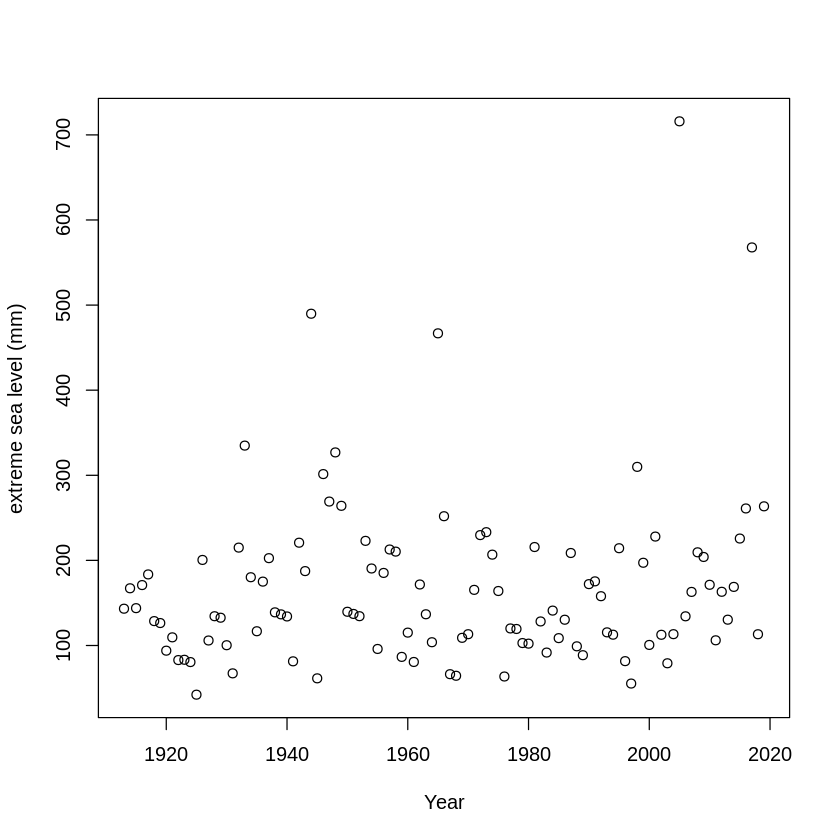

In [1]:
dat = read.csv("https://raw.githubusercontent.com/tonyewong/math251_fall2023/master/KeyWest-AnnualMaximumSeaLevels.csv")
year = dat[,"year"]
sealevel = dat[,"height"]
plot(year, sealevel, xlab="Year", ylab="extreme sea level (mm)")

# DELETE - for your reference

Older versions:

https://drive.google.com/file/d/1okx5QNIySCFP-5kLyv-jolBRZylr6Edw/view?usp=sharing

https://drive.google.com/file/d/19TcbzaF4NbE8DbV9MxlVp-dtjAwnQRWl/view?usp=sharing

<br>

### Task 17

To make predictions about the likelihood of extreme sea levels, we often fit a statistical distribution to a set of data like this one. Then, we can use the fitted distribution to compute the probabilities of dangerous events.

Fit a gamma distribution to the sea level data by choosing values for the shape parameter $\alpha$ and scale parameter $\beta$ so that your fitted gamma distribution has the same **mean** and **variance** as the data set `sealevel`. Clearly state what values these parameters should take, showing all work to compute them. _(Answer check: $\beta \approx 61$. Even though I am giving you $\beta$, you still need to show your work solving for it.)_

**SOLUTION:**

The mean and variance of the gamma distribution are given by $E[X] = \alpha \beta$ and $Var(X) = \alpha \beta^2$. We match these to our data set:

In [ ]:
EX = mean(sealevel)
VarX = var(sealevel)
print(paste("E[X]  =",round(EX,2)))
print(paste("Var(X)=",round(VarX,2)))

beta = VarX/EX
alpha = EX/beta
print(paste("alpha =",round(alpha,2)))
print(paste("beta  =",round(beta,2)))

[1] "E[X]  = 167.95"
[1] "Var(X)= 10257.23"
[1] "alpha = 2.75"
[1] "beta  = 61.07"


<br>

### Task 18

Use the code block below to plot the gamma pdf that you fit in the previous task, superimposed on the density histogram for the data. You will need to replace `YOUR_ALPHA` and `YOUR_BETA` with the values for $\alpha$ and $\beta$ that you found in the previous task.

In [ ]:
x = seq(from=0, to=2000, by=10)
fx = dgamma(x, shape=YOUR_ALPHA, scale=YOUR_BETA)

hist(sealevel, xlab="Sea level height (mm)", ylab="Density", breaks=20,
col="coral", main="Histogram of annual maximum sea level\nwith fitted gamma distribution", freq=FALSE)
lines(x,fx, lwd=3)

**SOLUTION:**

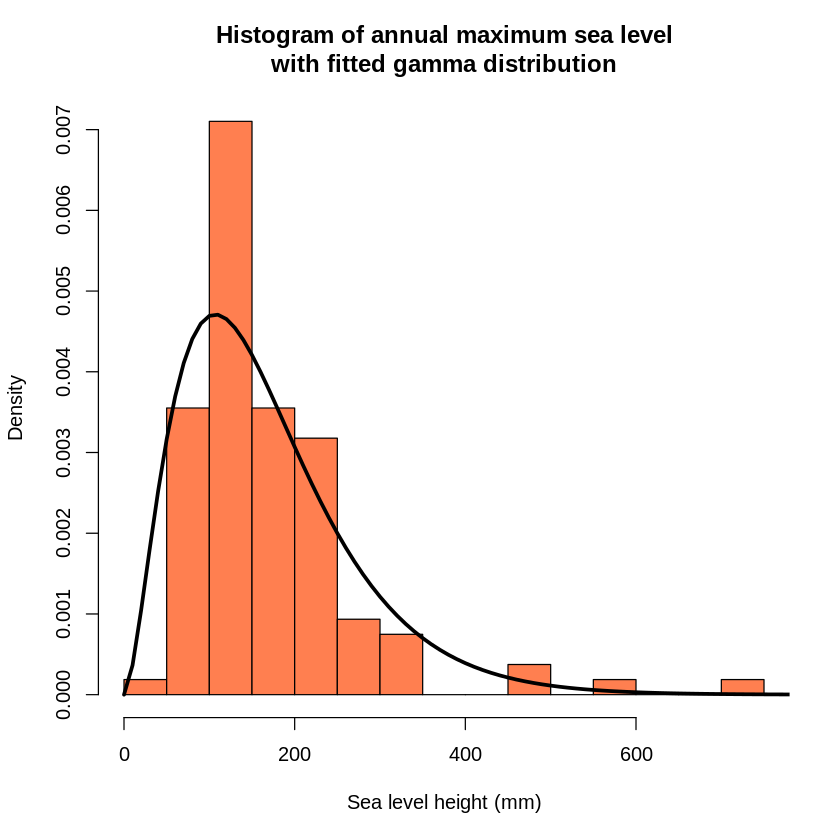

In [ ]:
x = seq(from=0, to=2000, by=10)
fx = dgamma(x, shape=alpha, scale=beta)

hist(sealevel, xlab="Sea level height (mm)", ylab="Density", breaks=20, col="coral",
     main="Histogram of annual maximum sea level\nwith fitted gamma distribution", freq=FALSE)
lines(x,fx, lwd=3)

<br>

### Task 19

Use your fitted gamma distribution to compute the probability that the annual maximum extreme sea level for Key West is more than half of a meter. If we let $X$ represent our random variable for the annual maximum extreme sea level (in millimeters), then this is $P(X > 500)$.

**SOLUTION:**

In [ ]:
print(paste("P(X > 0.5m) =",1-pgamma(500, shape=alpha, scale=beta)))

[1] "P(X > 0.5m) = 0.00845125711933203"


<br>

### Task 20

As the climate changes, a prominent damaging impact is how extreme sea levels can become more frequent and more severe. We can examine this in the data set by repeating our calculation of $P(X > 500)$ from the previous task two times:
* first, by using only the first 50 years of data to fit our gamma distribution, and
* second, by using only the last 50 years of data.
* Then, we can compare the resulting $P(X > 500)$ probabilities to see how much more likely hazardous extreme sea levels have become over time.

Compute both of these probabilities. Comment on the results - how has the probability changed over time? If it has increased/decreased, by how much?

**SOLUTION:**

$P(X > 500)$ is about 10x higher in the last 50 years than in the first 50 years.

In [2]:
# first 50:
EX = mean(sealevel[1:50]); VarX = var(sealevel[1:50])
print(paste("E[X]  =",round(EX,2))); print(paste("Var(X)=",round(VarX,2)))

beta1 = VarX/EX; alpha1 = EX/beta1
print(paste("alpha1 =",round(alpha1,2))); print(paste("beta1  =",round(beta1,2)))

print(paste("P(X > 0.5) =",1-pgamma(500, shape=alpha1, scale=beta1)))

[1] "E[X]  = 162.33"
[1] "Var(X)= 6732.9"
[1] "alpha1 = 3.91"
[1] "beta1  = 41.48"
[1] "P(X > 0.5) = 0.00195656636275865"


In [9]:
# last 50:
idx = (length(sealevel)-50+1):length(sealevel)
EX = mean(sealevel[idx]); VarX = var(sealevel[idx])
print(paste("E[X]  =",round(EX,2))); print(paste("Var(X)=",round(VarX,2)))

beta2 = VarX/EX; alpha2 = EX/beta2
print(paste("alpha2 =",round(alpha2,2))); print(paste("beta2  =",round(beta2,2)))

print(paste("P(X > 0.5) =",1-pgamma(500, shape=alpha2, scale=beta2)))

[1] "E[X]  = 173.1"
[1] "Var(X)= 12825.98"
[1] "alpha2 = 2.34"
[1] "beta2  = 74.1"
[1] "P(X > 0.5) = 0.0152221471047085"


<br>

### Task 21: Odds Ratios

In many settings, we want to compare the relative likelihood of a particular event under multiple cases of an even of interest. An [odds ratio](https://en.wikipedia.org/wiki/Odds_ratio) is a common way to show the relative likelihood of one outcome for that event versus another, in light of some potentially modulating effect of another event. In our case, we can compute the odds of seeing extreme sea level more than half a meter, relative to the extreme sea level being less than half of a meter. The modulating event will be time, specifically, the first 50 years versus the last 50 years.

In general, we calculate an odds ratio for some **test** group relative to a **control** group by comparing their relative **odds**. The odds for an event of interest occurring in the test group, for example, is the ratio of the probability the event of interest occurred ($P(X > 500\text{ mm})$) to the probability that the event of interest did _not_ occur ($1-P(X > 500\text{ mm})$). This means the odds of the event "$X > 500$" occurring in the last 50 years is given by:

$$\text{odds}_{\text{last 50}} = \dfrac{P(X > 500)_{\text{last 50}}}{1-P(X > 500)_{\text{last 50}}}$$

The odds ratio is the ratio of the odds for the test group (last 50 years) to the odds of the control group (first 50 years of data):

$$\text{odds ratio} = \dfrac{\text{odds}_{\text{last 50}}}{\text{odds}_{\text{first 50}}}$$

Compute the odds ratio for extreme sea level greater than half of a meter to find out how much more likely we are to see such high sea levels now, versus in the early 20th century.

**SOLUTION:**

We're about 8 times more likely to see extreme sea levels exceeding half a meter now as in the first half of the century.

In [ ]:
odds_last50 = (1-pgamma(500, shape=alpha2, scale=beta2))/pgamma(500, shape=alpha2, scale=beta2)
odds_first50 = (1-pgamma(500, shape=alpha1, scale=beta1))/pgamma(500, shape=alpha1, scale=beta1)
print(odds_last50/odds_first50)

[1] 7.884833


<br>

### Task 22

Suppose you aren't quite convinced yet that these extreme sea levels have become more hazardous over time. What other values could you compute and compare between the fitted gamma distributions from the first 50 and last 50 years of data?

Compute at least one new metric that we can use to assess whether extreme sea level has gotten more frequent or severe over time, and compare this for the first 50 years and the last 50 years of our data set. This should be using your two separate fitted gamma distributions from Task 20. Write a sentence or two to summarize what you did and to report the findings.

**SOLUTION:**

Answers will vary.

I'll calculate the 99th percentile of the distribution of extreme sea levels below. Turns out the 99th percentile of extreme sea level has increase by about 10cm over the last 100 years (roughly speaking).

In [ ]:
print(paste("99th percentile from first 50 years =", round(qgamma(0.99, shape=alpha1, scale=beta1),2),"mm"))
print(paste("99th percentile from last 50 years = ", round(qgamma(0.99, shape=alpha2, scale=beta2),2),"mm"))

[1] "99th percentile from first 50 years = 419.87 mm"
[1] "99th percentile from last 50 years =  537.34 mm"
